# Gradient Descent

Examples of Gradient Descent and how it works.

## Imports and Packages

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np

# Example 1 - Simple Cost Function
$$f(x) = x^2 + x + 1$$

In [27]:
def f(x) :
    return x**2 +  x + 1

Create a data array containing 500 points between -3 and 3 using the Numpy `linspace()` function.

In [28]:
xData = np.linspace(start=-3, stop=3, num=500)

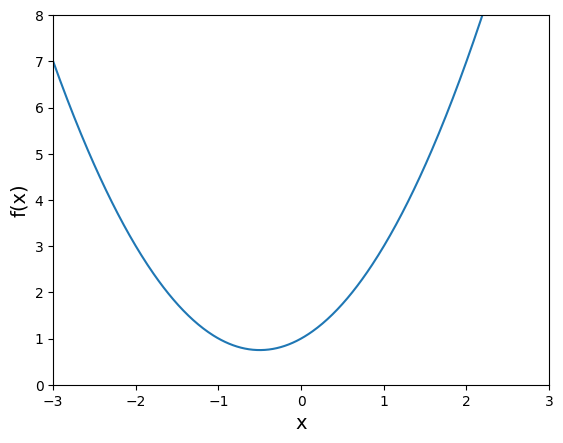

In [29]:
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.plot(xData, f(xData))
plt.show()

## Slope and Derivatives
The minimum of the cost function will be where the tangent to the function is a constant, or the where the derivative of the cost function is zero. Create a function for the derivative of the cost function:

In [30]:
def df(x) :
    return 2 * x + 1

This is because:
$$ \frac{d}{dx} f(x) = \frac{d}{dx} (x^2 + x + 1) =  2x + 1 $$

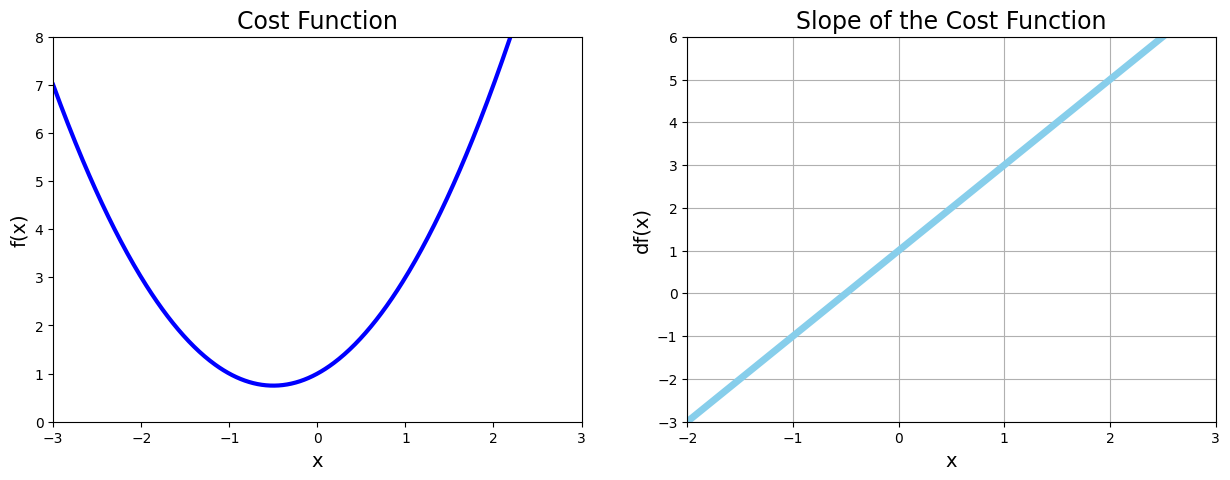

In [31]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.plot(xData, f(xData), color='blue', linewidth=3)

plt.subplot(1, 2, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('df(x)', fontsize=14)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()

plt.plot(xData, df(xData), color='skyblue', linewidth=5)
plt.show()

## Gradient Descent Algorithm

In [46]:
new_x = 3                   # Starting point
previous_x = 0              # Temporary variable used to hold previous value of x
step_multiplier = 0.1       # Learning rate (also called gamma).
precision = 0.0001          # Used to determine when to stop the loop.

x_values = [new_x]          # List to hold x values for plotting.
slope_list = [df(new_x)]    # List to hold calculated slope for each x value.

# Gradient descent algorithm loop
for n in range (500) :
    previous_x = new_x
    gradient = df(previous_x)
    # Find the new value of x by adjusting the current value of x by gradient (using the learning rate to control the size of steps).
    new_x = previous_x - step_multiplier * gradient
    x_values.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    # Stop the algorithm when the delta-x is less than the precision value.
    if step_size < precision:
        print('The loop rand : ', n, " times.")
        break

print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point: ', df(new_x))
print('f(x) value or cost at this point: ', f(new_x))

The loop rand :  40  times.
Local minimum occurs at:  -0.49962781616118024
Slope or df(x) value at this point:  0.0007443676776395236
f(x) value or cost at this point:  0.7500001385208099


Plot values from gradient descent on top of cost function and the derivative of the cost function.

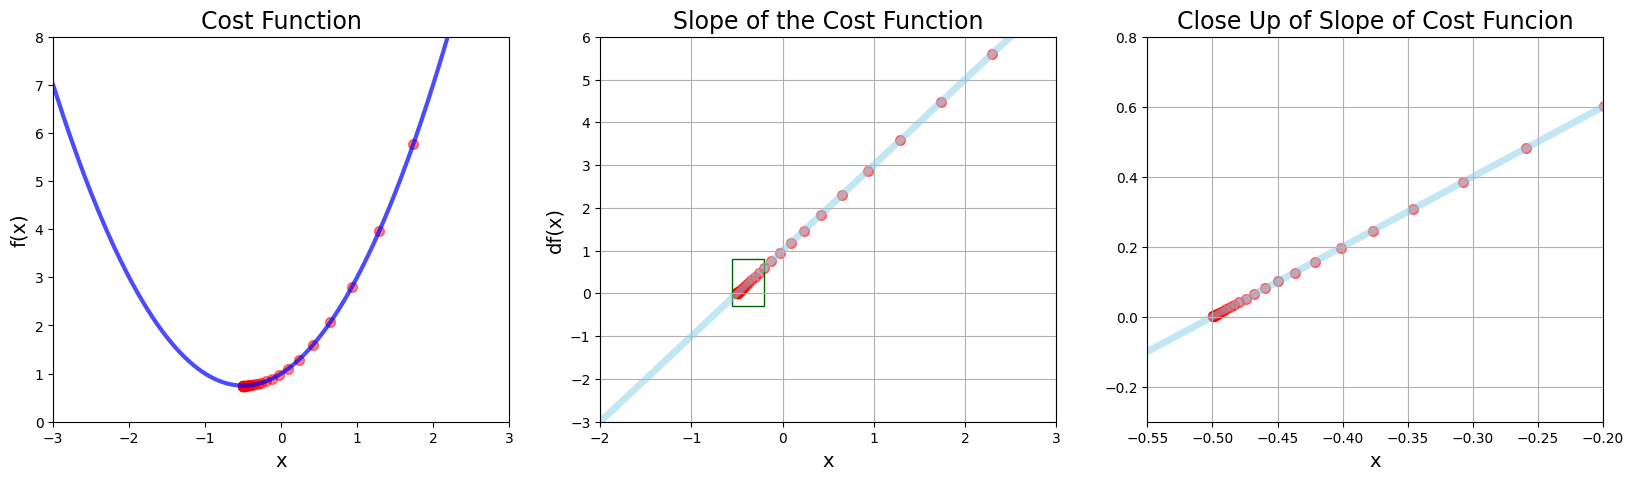

In [62]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.title('Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.plot(xData, f(xData), color='blue', linewidth=3, alpha=0.7)
values = np.array(x_values)
plt.scatter(x_values, f(values), color='red', s=50, alpha=0.5)

plt.subplot(1, 3, 2)
plt.title('Slope of the Cost Function', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.ylabel('df(x)', fontsize=14)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()

plt.plot(xData, df(xData), color='skyblue', linewidth=5, alpha=0.5)
plt.scatter(x_values,  slope_list, color='red', s=50, alpha=0.5)
plt.gca().add_patch(patch.Rectangle((-0.55, -0.3), width=0.35, height=1.1, fill=False, color='darkgreen'))

plt.subplot(1, 3, 3)
plt.title('Close Up of Slope of Cost Funcion', fontsize=17)
plt.xlabel('x', fontsize=14)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()

plt.plot(xData, df(xData), color='skyblue', linewidth=5, alpha=0.5)
plt.scatter(x_values,  slope_list, color='red', s=50, alpha=0.5)


plt.show()